<a href="https://colab.research.google.com/github/Aryalakshmip/Exploratory-dataanalysis-using-python/blob/main/POLYNOMIAL_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def readData(path):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        x = []
        y = []
        for row in csv_reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
        return x, y

In [3]:
def meanSquaredError(y, calculatedY):
    error = 0
    for index, value in enumerate(y):
        error += (value - calculatedY[index]) ** 2
    return error / len(y) / 2

In [4]:
def linearRegression(dataX, dataY, maxIterations, learningRate):
    xMatrix = np.c_[np.ones((len(dataX), 1)), dataX]  # Add 1's to the one dimensional matrix
    analytical = np.linalg.inv(xMatrix.T.dot(xMatrix)).dot(xMatrix.T).dot(dataY)
    errorValues = []  # Mean squared error for every iteration
    m = random.uniform(-1, 1)
    n = random.uniform(-1, 1)
    bonusFunctions = []  # Function parameters at every 10th iteration
    error = 1
    iteration = 0
    for i in range(maxIterations):
        iteration += 1
        # y = m * x + n
        calculatedY = np.empty(len(dataY))
        for j in range(len(dataX)):
            calculatedY[j] = dataX[j] * m + n
        error = meanSquaredError(dataY, calculatedY)
        errorValues.append(error)
        if iteration != 1 and errorValues[iteration - 2] - errorValues[iteration - 1] < 0.0000001:
            print("Finished in", iteration, "iterations")
            break
        if iteration % 10 == 1:
            bonusFunctions.append([m, n])
        mDerivative = (2 * np.dot(np.transpose(dataX), (calculatedY - dataY))) / len(dataX)
        m -= mDerivative * learningRate  # Slightly adjust the m
        nDerivative = (2 * np.sum(calculatedY - dataY)) / len(dataX)
        n -= nDerivative * learningRate  # Slightly adjust the n
    print("m:", m, "n:", n)
    plotLineGraph(dataX, dataY, m, n, analytical)
    plotLossGraph(errorValues, learningRate)
    plotBonusGraph(dataX, dataY, bonusFunctions, learningRate)


In [5]:
def polynomialRegression(dataX, dataY, maxIterations, learningRate, degree):
    parameters = []
    for i in range(degree + 1):
        parameters.append(random.uniform(-1, 1))  # Random float between -1 and 1
    # y =  p0 + p1*x + p2*x^2 + p3*x^3
    error = 1
    errorValues = []    # Mean squared error for every iteration
    iteration = 0
    for i in range(maxIterations):
        iteration += 1
        calculatedY = np.zeros(len(dataY))
        for j in range(len(dataX)):
            for index, p in enumerate(parameters):
                if index == 0:
                    xPowered = 1
                else:
                    xPowered = dataX[j] ** index
                calculatedY[j] += p * xPowered
        error = meanSquaredError(dataY, calculatedY)
        errorValues.append(error)
        if iteration != 1 and errorValues[iteration - 2] - errorValues[iteration - 1] < 0.00000001:
            print("Finished in", iteration, "iterations with final mean error:", errorValues[iteration - 1])
            break
        derivatives = np.zeros(degree + 1)
        for d in range(degree + 1):
            if d == 0:
                derivatives[d] = (2 * np.sum(calculatedY - dataY))
            else:
                xx = []
                for x in dataX:
                    xx.append(x ** d)
                derivatives[d] = (2 * np.dot(np.transpose(xx), (calculatedY - dataY)))
            parameters[d] -= derivatives[d] * learningRate  # Slightly adjust the parameters

    for index, p in enumerate(parameters):
        print("p", index, "=", p)
    plotPolynomialGraph(dataX, dataY, parameters)

In [6]:
def plotLineGraph(dataX, dataY, m, n, analytical):
    plt.figure(figsize=(10, 7))
    # Plot both lines, analytical solution and gradient descent solution
    x = np.linspace(0, 1, 101)
    gradientY = m * x + n
    analyticalY = analytical[1] * x + analytical[0]
    plt.plot(x, analyticalY, color='#20941E', linewidth=8, alpha=0.5)
    plt.plot(x, gradientY, color='black', linewidth=3, alpha=0.6)
    # Plot data points
    plt.scatter(dataX, dataY)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("Gradient descent solution: %fx + %f    -    Analytical solution: %fx + %f" %
              (m, n, analytical[1], analytical[0]))
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

In [7]:
def plotLossGraph(loss, learningRate):
    iteration = len(loss)
    plt.figure(figsize=(10, 7))
    # Plot loss graph
    x = np.linspace(0, iteration - 1, iteration)
    plt.plot(x, loss, marker='o')
    plt.xlim(0, iteration)
    plt.title("Loss vs iteration    -    Final loss function value: %f    -    Learning rate: %f" %
              (loss[len(loss) - 1], learningRate))
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()


In [8]:
def plotPolynomialGraph(dataX, dataY, params):
    plt.figure(figsize=(10, 7))
    # Plot both lines, analytical solution and gradient descent solution
    x = np.linspace(0, 1, 101)
    for index, p in enumerate(params):
        if index == 0:
            gradientY = p
        else:
            gradientY += x ** index * p

    plt.plot(x, gradientY, color='black', linewidth=3, alpha=0.6)
    # Plot data points
    plt.scatter(dataX, dataY)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    gradientSolution = "Gradient descent solution: "
    for i in range(len(params)):
        gradientParameter = "{:.4f}".format(params[i]) + "x^" + str(i)
        if i != len(params) - 1:
            gradientParameter += " + "
        gradientSolution += gradientParameter
    plt.title(gradientSolution)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()


Finished in 85 iterations
m: -0.8815744393867707 n: 0.9818947322798389


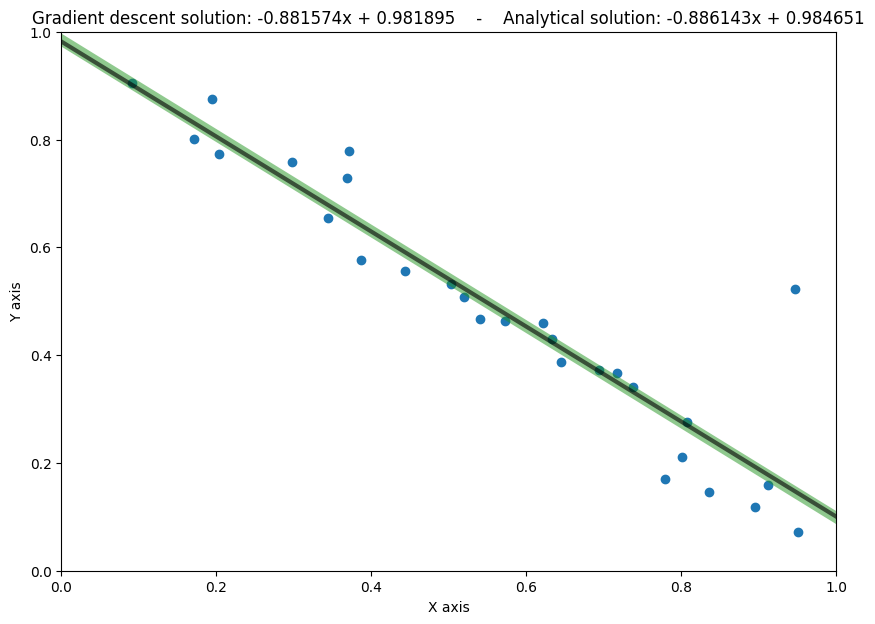

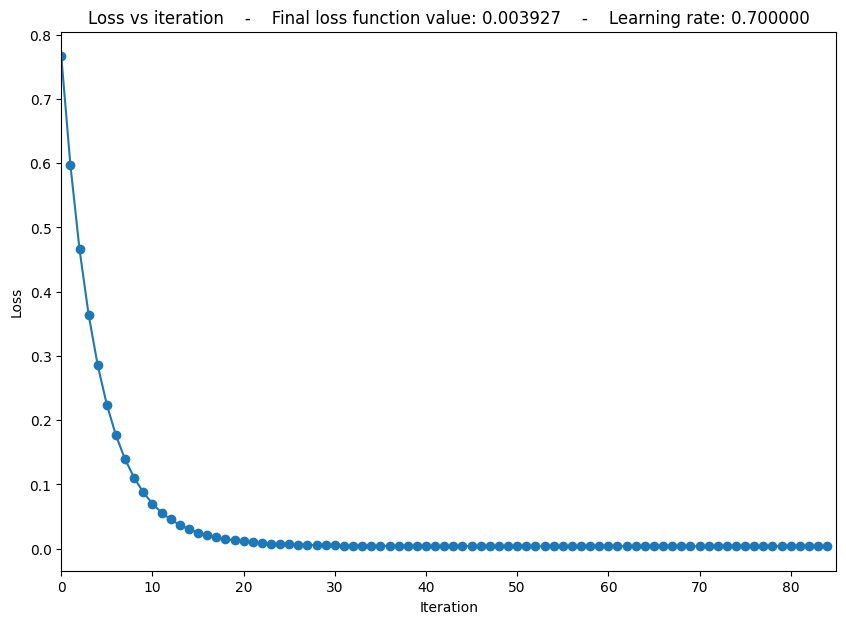

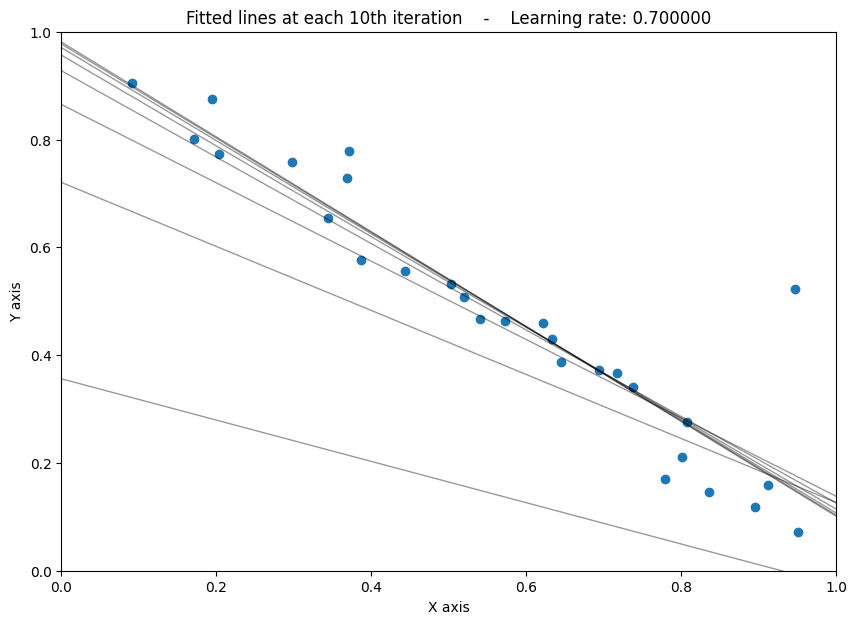

Finished in 417 iterations
m: -0.3643457750154766 n: 0.6032761747399157


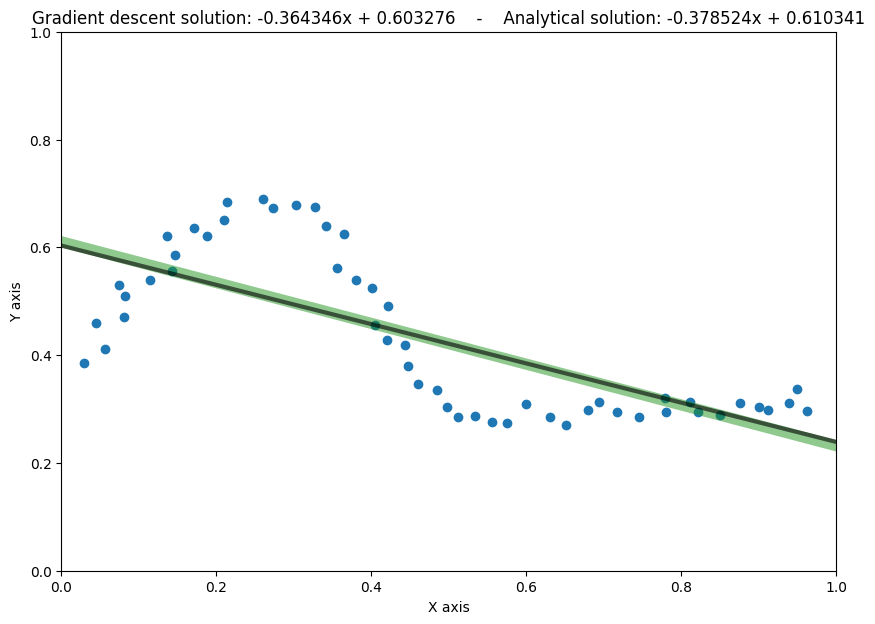

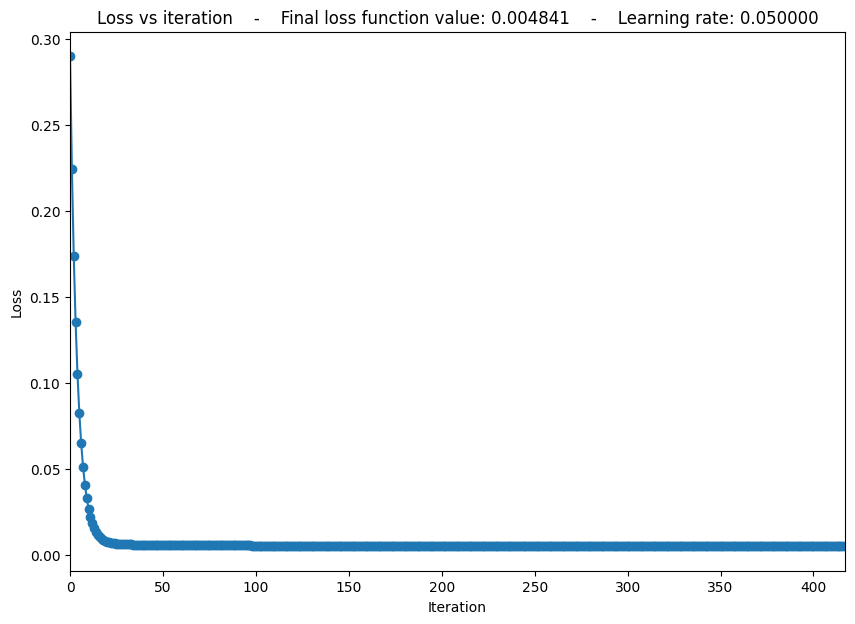

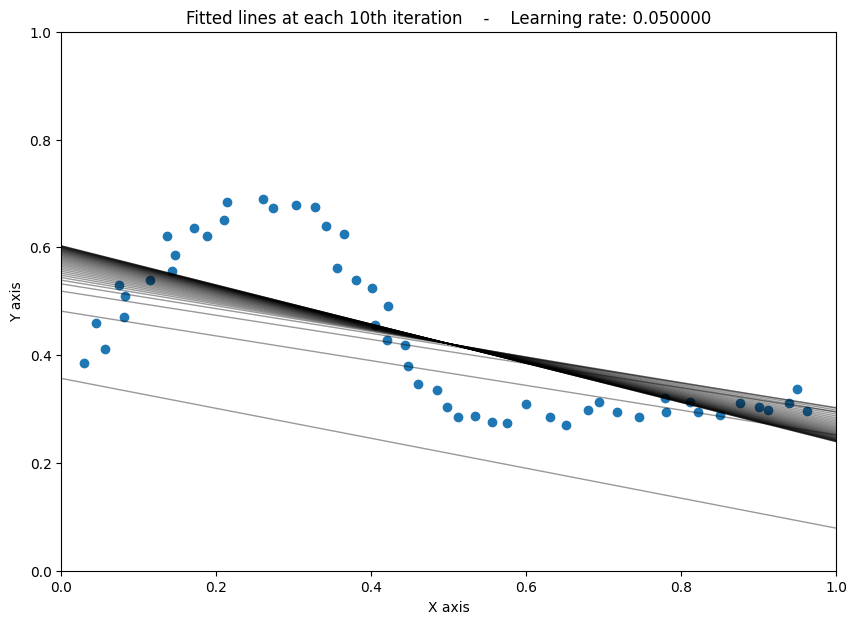

Finished in 23689 iterations with final mean error: 0.0019909171910301596
p 0 = 0.4062142312764615
p 1 = 1.9836528567735447
p 2 = -5.947729346003297
p 3 = 4.012846689417911


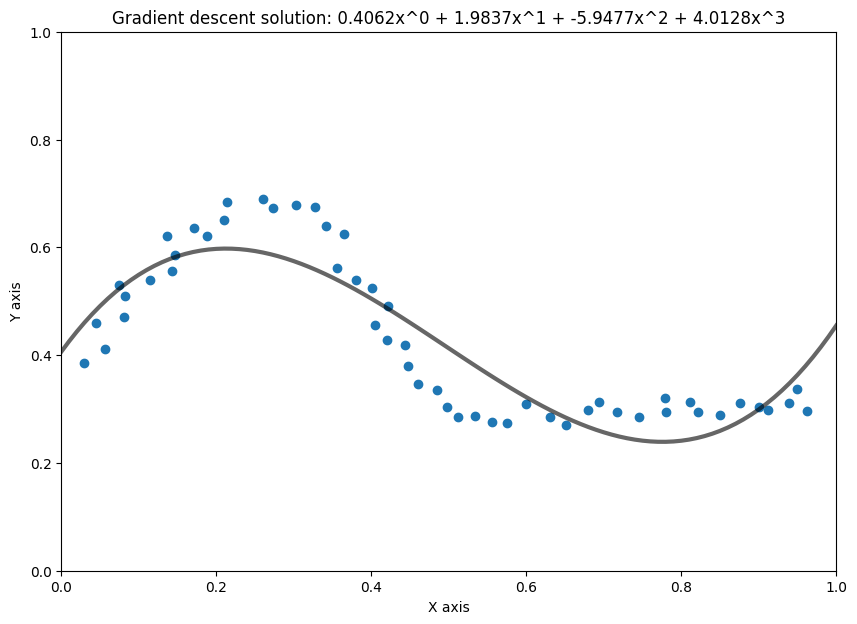

In [9]:
def plotBonusGraph(dataX, dataY, params, learningRate):
    x = np.linspace(0, 1, 101)
    plt.figure(figsize=(10, 7))
    # Plot lines found by the gradient descent algorithm at each 10th iteration
    for p in params:
        gradientY = p[0] * x + p[1]
        plt.plot(x, gradientY, color='black', linewidth=1, alpha=0.4)
    plt.scatter(dataX, dataY)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("Fitted lines at each 10th iteration    -    Learning rate: %f" % learningRate)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()


data1X, data1Y = readData("data1.csv")
data2X, data2Y = readData("data2.csv")
linearRegression(data1X, data1Y, 1000000, 0.7)
linearRegression(data2X, data2Y, 1000000, 0.05)
polynomialRegression(data2X, data2Y, 100000, 0.01, 3)